In [1]:
import pandas as pd
import numpy as np

In [3]:
db = pd.read_csv("owid-covid-data.csv", sep = ",")

In [5]:
# 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati


colonne = db.shape[1] # conteggio le colonne
righe = db.shape[0] # conteggio le righe

print("Il DataBase contiene", colonne, "colonne", "e", righe, "righe") # capisco la grandezza del db

db.info() # per vedere i tipi di dati contenuti all'interno delle colonne

db.describe() # visualizzo dati sulle colonne numeriche

db.isna().sum() # vedo all'interno delle colonne, se ci sono valori nulli


Il DataBase contiene 67 colonne e 429435 righe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed    

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [7]:
# 2.Si chiede di trovare, per ogni continente: a. il numero di casi fin dall'inizio della pandemia b. la percentuale rispetto al totale mondiale del numero di casi

# A
continente_casi= db.groupby('continent').sum('total_cases') # raggruppo i continenti e sommo i casi totali

continente_casi_filtro = continente_casi[['total_cases']] # filtro solo la colonna total_cases

display(continente_casi_filtro)

# mi sono accorto con db.isna().sum() che ci sono delle celle vuote in "continent", aprendo il csv noto che i continenti sono presenti anche nella colonna "location" se non sono valori duplicati,
# li sommo ai total_cases altrimenti non li considero

continente_in_location= db.groupby('location').sum('total_cases') # raggruppo per recuperarmi, i continenti
continente_in_location_filtro = continente_in_location[['total_cases']] # filtro solo la colonna total_cases

filtro_continenti= continente_in_location_filtro.loc[['Africa','Asia','Europe','North America','Oceania','South America']] # filtro solo i continenti

#print(filtro_continenti)

# noto che facendo un print() la somma di  total_cases è lo stesso della colonna "continent", di conseguenza per me sono valori duplicati e non li considero nel conteggio dei totali



# B

totale_casi_mondiale = continente_casi_filtro['total_cases'].sum() # faccio la somma di tutti i casi mondiali

continente_casi_filtro= (continente_casi_filtro['total_cases'] / totale_casi_mondiale)*100 # formula per capire l'incidenza del numero sul totale %

display(continente_casi_filtro) # stampa del valore espresso in percentuale


,total_cases
continent,
Africa,1.461689e+10
Asia,2.521673e+11
Europe,2.367567e+11
North America,1.270737e+11
Oceania,1.159805e+10
South America,7.348457e+10


continent
Africa            2.042328
Asia             35.233800
Europe           33.080567
North America    17.755229
Oceania           1.620525
South America    10.267551
Name: total_cases, dtype: float64

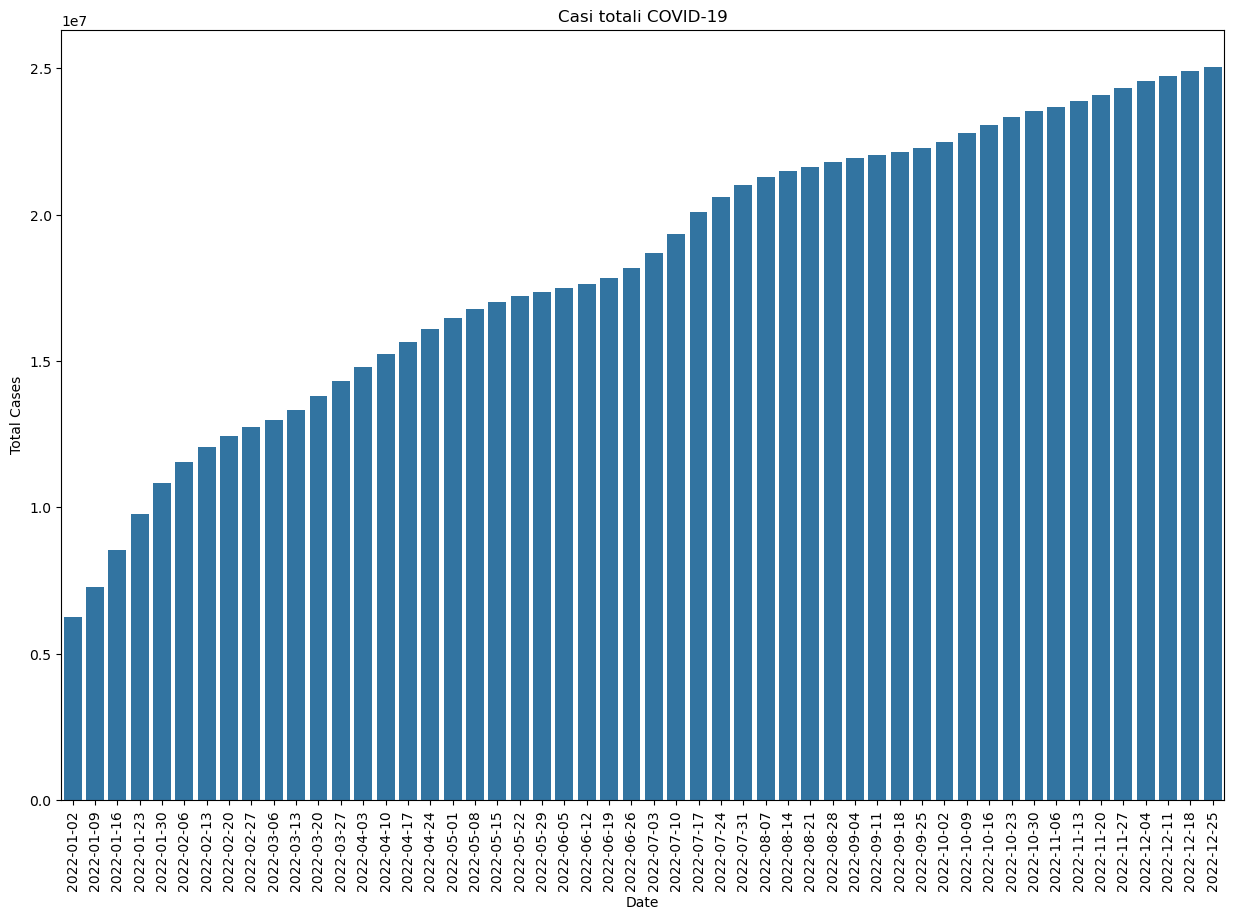

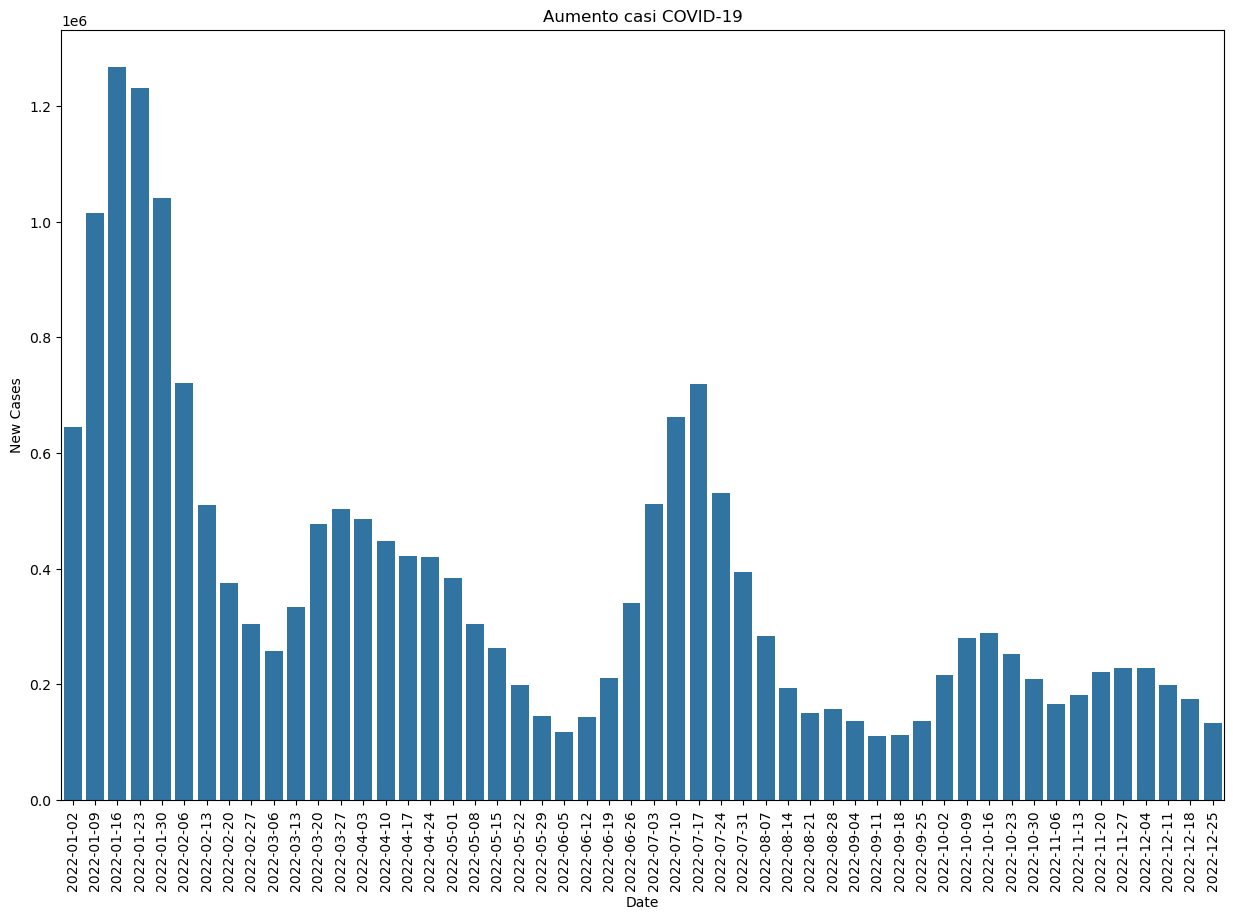

In [9]:
# 3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati:
# A.l'evoluzione del casi totali dall'inizio alla fine dell'anno
# B.il numero di nuovi casi rispetto alla data

# A

import seaborn as se
import matplotlib.pyplot as plt

db_filtrato = db.loc[:, ['location', 'date', 'total_cases', 'new_cases']] # filtro le colonne interessate
db_filtrato['date'] = pd.to_datetime(db_filtrato['date']) #trasformo date in formato data
filtro_2022 = db_filtrato[db_filtrato['date'].dt.year == 2022] #filtro solo il 2022
italia= filtro_2022[filtro_2022['location']=='Italy'] # filtro solo l'italia
italia_filtrato = italia[(italia['new_cases'] != 0.0) & (italia['new_cases'].notna())] # filtro solo le celle con valori in new_cases

italia_2022=italia_filtrato.sort_values('date', ascending=True) #ordinato in modo crescente per la visualizzazione dati

#print(italia_2022)

# definisco l'istogramma
plt.figure(figsize=(15,10))
se.barplot(x='date', y='total_cases', data=italia_2022)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=90) # ruoto le date di 90° per renderle leggibili
plt.title('Casi totali COVID-19')
plt.show()


# B
plt.figure(figsize=(15,10))
se.barplot(x='date', y='new_cases', data=italia_2022)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=90) # ruoto le date di 90° per renderle leggibili
plt.title('Aumento casi COVID-19')
plt.show()


<Axes: xlabel='location', ylabel='icu_patients'>

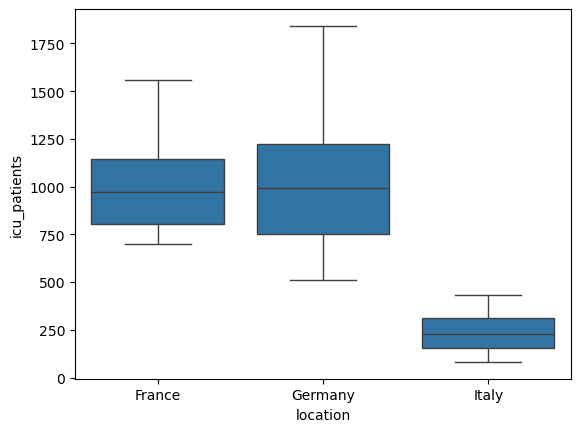

In [11]:
# 4. Riguardo le nazioni di Italia, Germania e Francia: 
# a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)
# b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

# A
# verificando con la funzione db.isna().sum() noto che ci sono delle celle vuote nella colonna icu_patients, ma ai fini di questa analisi, mi sembra che non diano fastidio

db['date'] = pd.to_datetime(db['date']) #trasformo la colonna date in datetime
filtro_data = db[(db['date'] >= '2022-05-01') & (db['date'] <= '2023-04-30')] # filtro solo il periodo interessato
filtro_colonne = filtro_data.loc[:, ['location','date','icu_patients']] # seleziono le colonne interessate
filtro_paesi= filtro_colonne[filtro_colonne['location'].isin(['Italy','Germany','France'])] # filtro i paesi interessati con funzione .isin

#display(filtro_paesi)

se.boxplot(data=filtro_paesi, x="location", y="icu_patients")

# B
# La francia, durante il periodo selezionato, ha avuto un minimo di pazienti in terapia intensiva, in torno alle 748 con una media costante intorno al migliaio e con alcuni picchi che l'anno portata ad avere poco più di 1500 pazienti in terapia
# La germania, ha avuto una situazione molto simile a quella della francia, ma meno contenuta. con minimi in reparto pari a 500 pazzienti e con un picco superiosi ai 1750 pazienti, ma in media ha avuto una situazione ballerina intorno ai 1000 pazienti
# L'italia, tra le 3, è quella che ha avuto la situazione più contenuta, con il numero minore di pazienti ricoverati, e in termini di oscillazione di massimi e minimi


In [15]:
# 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:
# a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)
# b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

# A
db['date']= pd.to_datetime(db['date']) # trasformo date in formato data
db_2021= db[(db['date']>='2021-01-01') & (db['date']<='2021-12-31')] # filtro solo il 2021

raggruppamento = db_2021.groupby('location').sum('hosp_patients') #raggruppo per location
filtro_location = raggruppamento[['hosp_patients']] #filtro la colonna interessata
filtro_stati= filtro_location.loc[['Germany','Italy','Spain', 'France']] #filtro i paesi interessati nell'indice

display(filtro_stati)

# B
# per la Germania non abbiamo dati, di conseguenza, non è possibile fare un'analisi sui pazienti ospitalizzati tedeschi per mancanza di dati nel db. Dubito fortemente che in tutto il 2021 non abbiano avuto pazienti ospitalizzati, quello che farei è chiedere spiegazioni  ai proprietari del db


,hosp_patients
location,
Germany,0.0
Italy,4419950.0
Spain,2411706.0
France,6008717.0
